## 1. Perkenalan
### 1.1 Deskripsi Data
Dataset berisi nilai matematika, membaca, dan menulis siswa. Siswa dikelompokkan menjadi 5 kelompok. Ada juga informasi tentang tingkat pendidikan orang tua siswa, makan siang siswa, dan apakah siswa menyelesaikan tes persiapan atau tidak.

### 1.2 Tujuan
Skor siswa bervariasi tergantung pada beberapa variabel. Kami akan menganalisis data skor siswa dengan menggunakan EDA, bootstraping, dan pengujian hipotesis. Hasil analisis akan menunjukkan variabel yang mempengaruhi nilai siswa.

## 2. Analisis Data
### 2.1 Data Pra-Pemrosesan
Pertama, kita perlu mengimpor paket yang kita butuhkan dan mengimpor file.

#### Import data yang diperlukan

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("students.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
print (df.shape)

(1000, 8)


In [7]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [8]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [9]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [10]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [11]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

## Deksripsi tentang kolom :

### Independent Variabel (Input)

gender : jenis kelamin (perempuan/laki-laki)

race/ethnicity : ras/etnis  ('group B', 'group C', 'group A', 'group D', 'group E')

parental level of education : tingkat pendidikan orang tua terdiri dari: ("bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school')

lunch : makan siang seperti apa yang di konsumsi ('standard', 'free/reduced')

test preparation course : kursus untuk persiapan ujian ('none', 'completed')

### Dependent Variabel (Target)

math score

reading score 

writing score



In [12]:
data = pd.read_csv('students.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


### Dari informasi di atas, kita melihat bahwa kita memiliki data yang cukup bagus tanpa nilai null. Tetapi kita perlu mengganti nama nama kolom dan tipe data untuk kemudahan pemrosesan data. Kita juga perlu menghitung skor akhir yang merupakan rata-rata skor matematika, membaca, dan menulis.

In [13]:
data = data.rename(columns={'race/ethnicity':'group', 'parental level of education':'p_edu', 'test preparation course':'t_prep', 'math score':'math', 'reading score':'read', 'writing score':'write'})
data['final'] = data.mean(numeric_only=True, axis=1).round(2)
data['gender'] = data.gender.astype('category')
data['group'] = data.group.astype('category')
data['p_edu'] = data.p_edu.astype('category')
data['t_prep'] = data.t_prep.astype('category')
data['lunch'] = data.lunch.astype('category')
print(data.info())
print(data.head())
print(data.describe())
print('Group : ', data.group.unique())
print("Parents' education level : ", data.p_edu.unique())
print('Test preparation : ', data.t_prep.unique())
print('lunch : ', data.lunch.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
gender    1000 non-null category
group     1000 non-null category
p_edu     1000 non-null category
lunch     1000 non-null category
t_prep    1000 non-null category
math      1000 non-null int64
read      1000 non-null int64
write     1000 non-null int64
final     1000 non-null float64
dtypes: category(5), float64(1), int64(3)
memory usage: 36.9 KB
None
   gender    group               p_edu         lunch     t_prep  math  read  \
0  female  group B   bachelor's degree      standard       none    72    72   
1  female  group C        some college      standard  completed    69    90   
2  female  group B     master's degree      standard       none    90    95   
3    male  group A  associate's degree  free/reduced       none    47    57   
4    male  group C        some college      standard       none    76    78   

   write  final  
0     74  72.67  
1     88  82.33  
2     93  

Text(0.5, 1.0, 'Final Score')

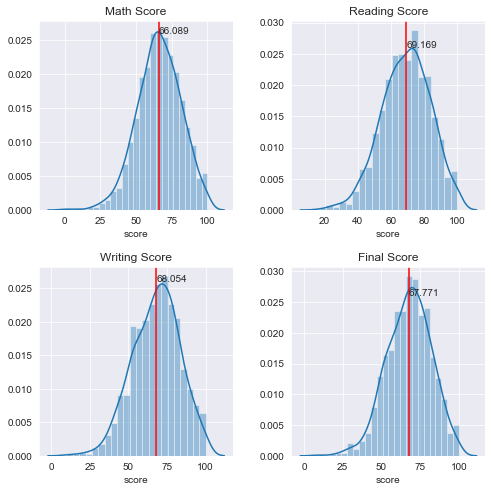

In [14]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(8,8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(2,2,1)
ax1 = sns.distplot(data.math, axlabel='score')
plt.axvline(data.math.mean(), color='r')
ax1.annotate(s=data.math.mean(), xy=(data.math.mean(), 0.026))
plt.title('Math Score')

plt.subplot(2,2,2)
ax2 = sns.distplot(data.read, axlabel='score')
plt.axvline(data.read.mean(), color='r')
ax2.annotate(s=data.read.mean(), xy=(data.read.mean(), 0.026))
plt.title('Reading Score')

plt.subplot(2,2,3)
ax3 = sns.distplot(data.write, axlabel='score')
plt.axvline(data.write.mean(), color='r')
ax3.annotate(s=data.write.mean(), xy=(data.write.mean(), 0.026))
plt.title('Writing Score')

plt.subplot(2,2,4)
ax4 = sns.distplot(data.final, axlabel='score')
plt.axvline(data.final.mean(), color='r')
ax4.annotate(s=round(data.final.mean(),3), xy=(data.final.mean(), 0.026))
plt.title('Final Score')


#### Dari ringkasan dan grafik di atas, kita melihat matematika, membaca, menulis, dan skor akhir memiliki distribusi normal. Mereka memiliki rata-rata sekitar 67 dan standar deviasi sekitar 15. Jadi, kami memiliki data yang didistribusikan dengan baik.

## 2.1 Exploratory Data Analysis (EDA)

### We want to see students' final score accross different groups

Text(0.5, 1.0, 'Final score distribution based on group')

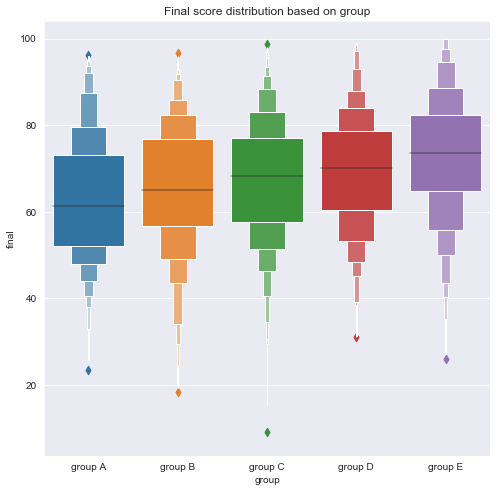

In [15]:
plt.figure(figsize=(8,8))
sns.boxenplot(data=data, x='group', y='final')
plt.title('Final score distribution based on group')

### Grafik di atas menunjukkan bahwa kelompok E memiliki skor akhir rata-rata tertinggi sedangkan kelompok A memiliki skor akhir rata-rata terendah. Kita perlu menemukan apa yang membuat kedua kelompok ini memiliki perbedaan kinerja yang signifikan. Ada tiga variabel yang mungkin mempengaruhi kinerja siswa. Mereka adalah makan siang, persiapan ujian, dan tingkat pendidikan orang tua.

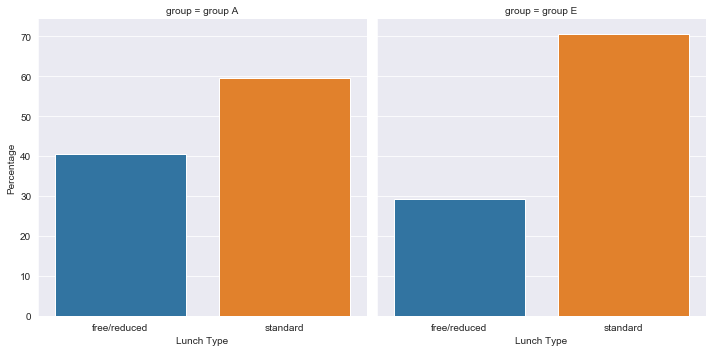

In [16]:
data['lunch_count'] = data['lunch']
data_1 = data.groupby(['group', 'lunch']).lunch_count.count()
data_1_ = data_1.groupby(level=0).apply(lambda x : 100*x/float(x.sum())).reset_index()
p = sns.catplot(data=data_1_, x='lunch', y='lunch_count', col='group', col_order=['group A', 'group E'], kind='bar', sharex=False)
p.set_axis_labels('Lunch Type', 'Percentage')

### Kami melihat bahwa kelompok E memiliki grafik makan siang standar yang lebih tinggi daripada kelompok A. Ini dapat mempengaruhi kinerja siswa. Kami akan menganalisis variabel ini nanti.

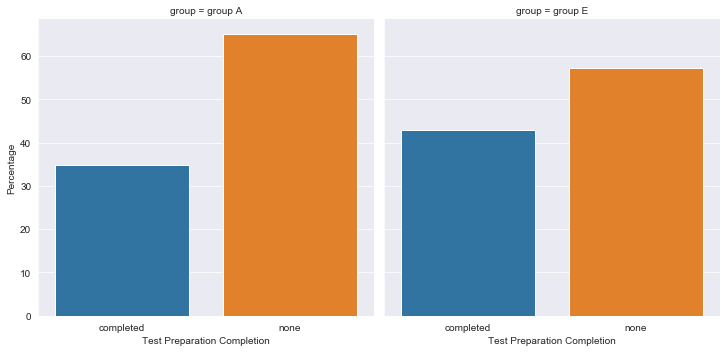

In [17]:
data['t_prep_count'] = data['t_prep']
data_2 = data.groupby(['group', 't_prep']).t_prep_count.count()
data_2_ = data_2.groupby(level=0).apply(lambda x : 100*x/float(x.sum())).reset_index()
p = sns.catplot(data=data_2_, x='t_prep', y='t_prep_count', col='group', col_order=['group A', 'group E'], col_wrap=3, kind='bar', sharex=False)
p.set_axis_labels('Test Preparation Completion', 'Percentage')


### Kami juga melihat bahwa kelompok E memiliki grafik yang lebih tinggi dari data siswa yang menyelesaikan persiapan ujian daripada kelompok A. Ini juga dapat mempengaruhi kinerja siswa. Kami akan menganalisis variabel ini nanti.

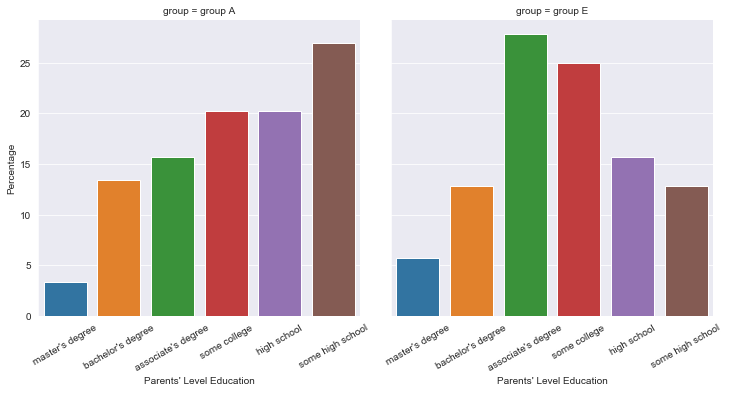

In [18]:
data['p_edu_count'] = data['p_edu']
data_3 = data.groupby(['group', 'p_edu']).p_edu_count.count()
data_3_ = data_3.groupby(level=0).apply(lambda x : 100*x/float(x.sum())).reset_index()
p = sns.catplot(data=data_3_, x='p_edu', order=["master's degree", "bachelor's degree", "associate's degree", 'some college', 'high school', 'some high school'], y='p_edu_count', col='group', col_order=['group A', 'group E'], col_wrap=3, kind='bar', sharex=False)
p.set_xticklabels(rotation=30)
p.set_axis_labels("Parents' Level Education", 'Percentage')

### Tingkat grafik pendidikan orang tua tertinggi dari kelompok E adalah gelar sarjana sedangkan kelompok A hanya beberapa sekolah menengah. Ini dapat mempengaruhi kinerja siswa juga. Kami akan menganalisis variabel ini nanti.

## 2.2 Statistical Analysis

### We want to analyze the differences of students' final score based-on parents' education level, lunch, and test preparation. We will analyze them by using graphical analysis, bootstraping, and hypothesis testing.

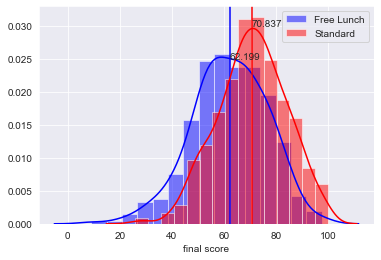

In [19]:
free = data[data['lunch'] == 'free/reduced']
standard = data[data['lunch'] == 'standard']

ax1 = sns.distplot(free.final, axlabel='final score', color='b', hist_kws=dict(alpha=0.5), label='Free Lunch', bins=15)
plt.axvline(round(free.final.mean(),2), color='b')
ax1.annotate(s=round(free.final.mean(),3), xy=(free.final.mean(), 0.025))
ax2 = sns.distplot(standard.final, axlabel='final score', color='r', hist_kws=dict(alpha=0.5), label='Standard', bins=15)
plt.axvline(round(standard.final.mean(),2), color='r')
ax1.annotate(s=round(standard.final.mean(),3), xy=(standard.final.mean(), 0.03))
plt.legend()

### Kami melihat bahwa siswa dengan makan siang standar memiliki skor dan hasil skor akhir yang lebih tinggi. Ini membuktikan bahwa makan siang telah mempengaruhi nilai akhir siswa. Untuk memastikan ini bukan peristiwa yang kebetulan, kami menggunakan metode bootstraping untuk menghitung nilai-P.

In [20]:
final_mean = data.final.mean()
free_mean = free.final.mean()
standard_mean = standard.final.mean()
lunch_diff = free_mean - standard_mean

free_shifted = free.final - free_mean + final_mean
standard_shifted = standard.final - standard_mean + final_mean

lunch_diff_shifted = []
for i in range(3000):
    free_samp = free_shifted.sample(frac=1, replace=True)
    standard_samp = standard_shifted.sample(frac=1, replace=True)
    lunch_diff_shifted.append(free_samp.mean() - standard_samp.mean())
    
p_val = np.sum(np.array(lunch_diff_shifted) <= lunch_diff)/len(lunch_diff_shifted)
print('Lunch final score different', round(lunch_diff,2))
print('Lunch P-Value : ', p_val)

Lunch final score different -8.64
Lunch P-Value :  0.0



### Dari hipotesis null, mereka memiliki nilai rata-rata yang sama. Dalam hal ini, kita mendapatkan nilai-P 0 karena memiliki nilai akhir rata-rata berbeda -8,64. Ini membuktikan bahwa kemungkinannya sangat kecil bahwa mereka memiliki nilai akhir yang berbeda dan itu bukan suatu peristiwa kebetulan.

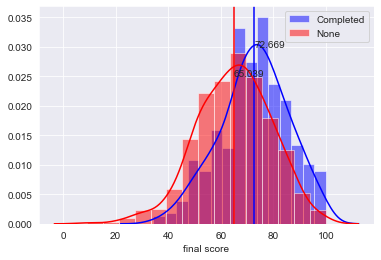

In [23]:
completed = data[data['t_prep'] == 'completed']
none = data[data['t_prep'] == 'none']

ax1 = sns.distplot(completed.final, axlabel='final score', color='b', hist_kws=dict(alpha=0.5), label='Completed', bins=15)
plt.axvline(round(completed.final.mean(),2), color='b')
ax1.annotate(s=round(completed.final.mean(),3), xy=(completed.final.mean(), 0.03))
ax2 = sns.distplot(none.final, axlabel='final score', color='r', hist_kws=dict(alpha=0.5), label='None', bins=15)
plt.axvline(round(none.final.mean(),2), color='r')
ax1.annotate(s=round(none.final.mean(),3), xy=(none.final.mean(), 0.025))
plt.legend()


### Kami melihat bahwa siswa yang menyelesaikan persiapan ujian memiliki nilai dan grafik skor akhir yang lebih tinggi. Ini membuktikan bahwa persiapan ujian telah mempengaruhi skor akhir siswa. Untuk memastikan ini bukan peristiwa acak, kami menggunakan metode bootstraping untuk menghitung nilai-P.

In [24]:
completed_mean = completed.final.mean()
none_mean = none.final.mean()
t_prep_diff = completed_mean - none_mean

completed_shifted = completed.final - completed_mean + final_mean
none_shifted = none.final - none_mean + final_mean

t_prep_diff_shifted = []
for i in range(3000):
    completed_samp = completed_shifted.sample(frac=1, replace=True)
    none_samp = none_shifted.sample(frac=1, replace=True)
    t_prep_diff_shifted.append(completed_samp.mean() - none_samp.mean())
    
p_val = np.sum(np.array(t_prep_diff_shifted) >= t_prep_diff)/len(t_prep_diff_shifted)
conf_int = np.percentile(t_prep_diff_shifted, [2.5, 97.5])
print('t_prep final score different', round(t_prep_diff,2))
print('t_prep P-Value : ', p_val)

t_prep final score different 7.63
t_prep P-Value :  0.0



### Di bawah hipotesis null, mereka memiliki rata-rata yang sama. Dalam hal ini, kita mendapatkan nilai-P 0 karena memiliki skor akhir rata-rata yang berbeda 7,34. Ini membuktikan bahwa ada kemungkinan yang sangat kecil bahwa mereka memiliki skor akhir yang berbeda adalah peristiwa acak.

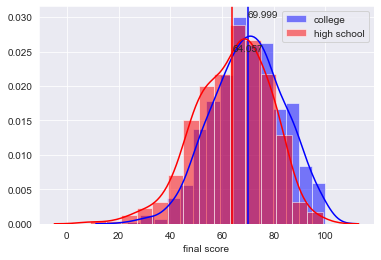

In [25]:
high_school = data.loc[(data.p_edu == 'high school') | (data.p_edu == 'some high school')]
college = data.loc[(data.p_edu != 'high school') & (data.p_edu != 'some high school')]

ax1 = sns.distplot(college.final, axlabel='final score', color='b', hist_kws=dict(alpha=0.5), label='college', bins=15)
plt.axvline(round(college.final.mean(),2), color='b')
ax1.annotate(s=round(college.final.mean(),3), xy=(college.final.mean(), 0.03))
ax2 = sns.distplot(high_school.final, axlabel='final score', color='r', hist_kws=dict(alpha=0.5), label='high school', bins=15)
plt.axvline(round(high_school.final.mean(),2), color='r')
ax2.annotate(s=round(high_school.final.mean(),3), xy=(high_school.final.mean(), 0.025))
plt.legend()


### Kami melihat bahwa siswa dengan orang tua yang memiliki tingkat pendidikan tinggi memiliki skor akhir yang lebih tinggi dan grafik yang sedikit lebih tinggi. Ini membuktikan bahwa tingkat pendidikan orang tua telah mempengaruhi nilai akhir siswa. Untuk memastikan ini bukan peristiwa kebetulan, kami menggunakan metode bootstraping untuk menghitung nilai-P.

In [26]:
high_school_mean = high_school.final.mean()
college_mean = college.final.mean()
p_edu_diff = high_school_mean - college_mean

high_school_shifted = high_school.final - high_school_mean + final_mean
college_shifted = college.final - college_mean + final_mean

p_edu_diff_shifted = []
for i in range(3000):
    high_school_samp = high_school_shifted.sample(frac=1, replace=True)
    college_samp = college.sample(frac=1, replace=True)
    p_edu_diff_shifted.append(high_school_samp.mean() - college_samp.mean())
    
p_val = np.sum(np.array(p_edu_diff_shifted) <= p_edu_diff)/len(p_edu_diff_shifted)
conf_int = np.percentile(p_edu_diff_shifted, [2.5, 97.5])
print('p_edu final score different : ', round(p_edu_diff,2))
print('p_edu P-Value : ', round(p_val,4))

p_edu final score different :  -5.94
p_edu P-Value :  0.006


### Dari hipotesis null, mereka memiliki rata-rata yang sama. Dalam hal ini, kita mendapatkan 0,0043 p-nilai karena memiliki skor akhir rata-rata yang berbeda -5,94. Ini menyiratkan bahwa ada kemungkinan kecil mereka memiliki skor akhir yang berbeda adalah acara acak.

## 3. Kesimpulan

### Berdasarkan data ini, ada 3 faktor yang mempengaruhi kinerja siswa. 

#### Pertama, makan siang siswa: Siswa dengan makan siang standar memiliki skor akhir yang lebih tinggi daripada makan siang gratis. 
#### Kedua, persiapan persiapan ujian: Siswa yang telah menyelesaikan persiapan ujian memiliki skor akhir yang lebih tinggi daripada yang belum.
#### Ketiga, tingkat pendidikan orang tua: Siswa yang memiliki orang tua dengan tingkat pendidikan tinggi memiliki skor akhir yang lebih tinggi daripada tingkat pendidikan menengah.